In [2]:
import statsmodels.api as sm #Modelos estadísticos
import numpy as np

#### Estadísticas Descriptivas

Si deseas una forma más corta y sencilla de graficar una distribución normal en Python utilizando np.random.normal, puedes hacer lo siguiente:

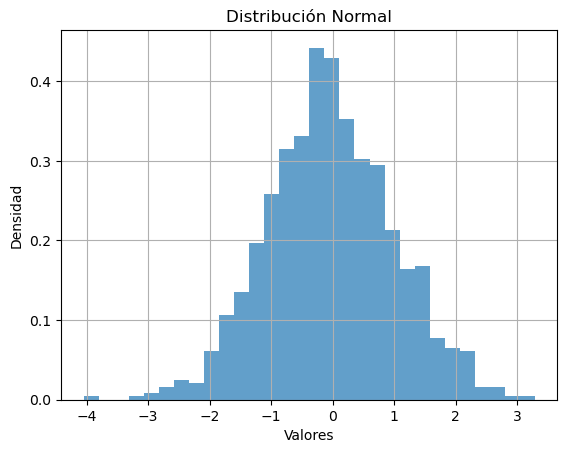

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos para la distribución normal
data = np.random.normal(0, 1, 1000)

# Graficar el histograma de los datos generados
plt.hist(data, bins=30, density=True, alpha=0.7)
plt.title('Distribución Normal')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

En este ejemplo, utilizamos np.random.normal para generar una muestra de 1000 datos de una distribución normal con media 0 y desviación estándar 1. Luego, utilizamos plt.hist para graficar el histograma de los datos generados. El argumento bins establece el número de contenedores en el histograma, density=True normaliza el histograma para que represente la densidad de probabilidad y alpha=0.7 ajusta la transparencia de las barras del histograma.

Este enfoque es más corto y simple, pero cabe mencionar que se trata de un histograma de los datos generados, no de una representación suave de la función de densidad de probabilidad. Dependiendo de tus necesidades, puedes elegir el enfoque que mejor se adapte a tu caso.

In [4]:
import statsmodels.api as sm

# Generar variables aleatorias de una distribución normal con numpy
normalRandomVariables = np.random.normal(0,1, 1000)

# Crear un objeto que contenga estadísticas descriptivas como variables.
x = sm.stats.DescrStatsW(normalRandomVariables)

print(x)

Como puedes ver en la salida anterior, hemos creado un objeto con el tipo "statsmodels.stats.weightstats.DescrStatsW".

Este objeto almacena diversas estadísticas descriptivas como la media, la desviación estándar, la varianza, etc., a las cuales podemos acceder.

In [4]:
# Media
print(x.mean)

# Desviación Estándar
print(x.std)

# Varianza
print(x.var)

-0.04834848407724988
0.9673230492032244
0.9357138815198238


La salida anterior muestra la media, la desviación estándar y la varianza de las 1000 variables aleatorias que generamos a partir de la distribución anteriormente generada.

Hay otras cosas interesantes que puedes hacer con este objeto, como generar intervalos de confianza y realizar pruebas de hipótesis.

#### Intervalos de Confianza

In [5]:
# Generar un intervalo de confianza para una proporción de población.
tstar = 1.96

# Proporción observada de la población.
p = .85

# Tamaño de la población
n = 659

# Construir el intervalo de confianza
sm.stats.proportion_confint(n * p, n)

(0.8227378265796143, 0.8772621734203857)

La salida anterior incluye los límites inferior y superior de un intervalo de confianza del 95% para la proporción de la población.

In [6]:
import pandas as pd

# Importar los datos que se utilizarán para construir el intervalo de confianza de la media poblacional.
df = pd.read_csv("https://raw.githubusercontent.com/UMstatspy/UMStatsPy/master/Course_1/Cartwheeldata.csv")

# Generar un intervalo de confianza para la media poblacional.
sm.stats.DescrStatsW(df["CWDistance"]).zconfint_mean()

(76.57715593233026, 88.38284406766975)

La salida anterior muestra los límites inferior y superior de un intervalo de confianza del 95% para la media poblacional.

Estas funciones deberían ser familiares, pero si no lo son, te recomendamos tomar el curso 2 de nuestra especialización.


#### Pruebas de Hipótesis

In [7]:
# Prueba de hipótesis de una proporción de población.

# Tamaño de la población.
n = 1018

# Hipótesis nula de la proporción de población
pnull = .52

# Proporción observada de la población
phat = .56

# Calcular el estadístico de prueba y el valor p
sm.stats.proportions_ztest(phat * n, n, pnull)

(2.571067795759113, 0.010138547731721065)

In [8]:
# Usando el dataframe importado anteriormente, realizar una prueba de hipótesis para la media poblacional.
sm.stats.ztest(df["CWDistance"], value = 80, alternative = "larger")

(0.8234523266982029, 0.20512540845395266)

#### Mínimos Cuadrados Ordinarios

Mínimos Cuadrados Ordinarios es un método para estimar los parámetros desconocidos en un modelo de regresión lineal. Esta es la función que utilizaremos cuando nuestra variable objetivo es continua.

In [3]:
import pandas as pd
import statsmodels.api as sm

da = pd.read_csv("nhanes_2015_2016.csv")

# Eliminar columnas no utilizadas, eliminar filas con valores faltantes.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI",
        "SMQ020", "SDMVSTRA", "SDMVPSU"]
da = da[vars].dropna()

da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

model = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR + RIAGENDRx", data=da)
res = mode
l.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 BPXSY1   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     697.4
Date:                Fri, 02 Jun 2023   Prob (F-statistic):          1.87e-268
Time:                        14:21:07   Log-Likelihood:                -21505.
No. Observations:                5102   AIC:                         4.302e+04
Df Residuals:                    5099   BIC:                         4.304e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           100.6305      0.71

El código anterior está creando una regresión lineal múltiple donde la variable objetivo es BPXSY1 y 
las dos variables predictoras son RIDAGEYR y RIAGENDRx.

Cabe destacar que la variable objetivo, BPXSY1, es una variable continua que representa la presión arterial.

### Análisis Mínimos Cuadrados Ordinarios

Estos datos corresponden a los resultados de una regresión lineal ordinaria (OLS, por sus siglas en inglés). A continuación, se describen los principales aspectos interpretativos de los resultados:

* R-cuadrado (R-squared): El coeficiente de determinación R-cuadrado indica la proporción de la varianza total de la variable dependiente (BPXSY1) que es explicada por el modelo. En este caso, el R-cuadrado es de 0.215, lo que significa que aproximadamente el 21.5% de la variabilidad de BPXSY1 puede ser explicada por las variables incluidas en el modelo.

* Coeficientes: Los coeficientes estimados para las variables independientes son los siguientes:

* Intercept: El valor del intercepto es 100.6305. Esto significa que cuando todas las variables independientes son iguales a cero, se espera que la variable dependiente tenga un valor de 100.6305.

* RIAGENDRx[T.Male]: Este coeficiente de 3.2322 indica el cambio promedio en la variable dependiente cuando se pasa de la categoría de género femenino (codificado como 0) a la categoría de género masculino (codificado como 1), manteniendo constante el valor de la otra variable independiente. En este caso, un cambio en el género de femenino a masculino se asocia, en promedio, con un aumento de 3.2322 en BPXSY1.

* RIDAGEYR: El coeficiente de 0.4739 indica el cambio promedio en la variable dependiente por cada unidad adicional en RIDAGEYR (edad), manteniendo constante el valor de la otra variable independiente. Por lo tanto, se espera que por cada año adicional en la edad, la variable dependiente aumente en 0.4739 unidades.

* Estadísticos de significancia: La columna P>|t| proporciona los valores p asociados con los coeficientes estimados. Estos valores p se utilizan para evaluar la significancia estadística de los coeficientes. En este caso, todos los coeficientes tienen valores p muy bajos (menores que 0.001), lo que indica que son estadísticamente significativos.

* Estadísticos adicionales: Los resultados también incluyen otros estadísticos como el estadístico F, el log-verosimilitud, el número de observaciones, el AIC (criterio de información de Akaike) y el BIC (criterio de información bayesiano). Estos estadísticos proporcionan información adicional sobre el ajuste y la calidad del modelo.

* Diagnóstico de residuos: Los estadísticos de omnibus, Durbin-Watson, Jarque-Bera (JB), skewness y kurtosis son medidas utilizadas para evaluar la normalidad y la independencia de los residuos del modelo. En este caso, el estadístico de omnibus y el estadístico JB sugieren que los residuos no siguen una distribución normal, mientras que el estadístico Durbin-Watson indica cierta correlación serial de los residuos.

* Condición número (Cond. No.): El condicionamiento del número se utiliza para evaluar la multicolinealidad en el modelo. Un valor alto del condicionamiento del número indica una alta multicolinealidad.

#### Modelos Lineales Generalizados

Si bien los modelos lineales generalizados son un tema amplio, en este curso estaremos utilizando esta suite de funciones para llevar a cabo la regresión logística. La regresión logística se utiliza cuando nuestra variable objetivo es un resultado binario, o una clasificación de dos grupos, que pueden ser denotados como grupo 0 y grupo 1.

In [5]:
import numpy as np

da["smq"] = da.SMQ020.replace({2: 0, 7: np.nan, 9: np.nan})
model = sm.GLM.from_formula("smq ~ RIAGENDRx", family=sm.families.Binomial(), data=da)
res = model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    smq   No. Observations:                 5094
Model:                            GLM   Df Residuals:                     5092
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3350.6
Date:                Fri, 02 Jun 2023   Deviance:                       6701.2
Time:                        14:24:52   Pearson chi2:                 5.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04557
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.7547      0.04

Arriba hay un ejemplo de creación de un modelo logístico donde el valor objetivo es SMQ020x, que en este caso es si esta persona es fumadora o no. El predictor es RIAGENDRx, que representa el género.

#### Ecuaciones Estimadas Generalizadas

Las Ecuaciones Estimadas Generalizadas calculan modelos lineales generalizados para datos de paneles, conglomerados o medidas repetidas cuando las observaciones pueden estar correlacionadas dentro de un conglomerado pero no correlacionadas entre conglomerados. Estas se utilizan principalmente cuando existe incertidumbre con respecto a la correlación entre los resultados. Las "Ecuaciones Estimadas Generalizadas" (GEE) ajustan modelos lineales marginales y estiman la correlación intraclase.

In [6]:
da["group"] = 10*da.SDMVSTRA + da.SDMVPSU
model = sm.GEE.from_formula("BPXSY1 ~ 1", groups="group", cov_struct=sm.cov_struct.Exchangeable(), data=da)
res = model.fit()
print(res.cov_struct.summary())


The correlation between two observations in the same cluster is 0.030


Aquí estamos creando un modelo lineal marginal de BPXSY1 para determinar el valor estimado de la ICC, lo cual indicaría si existen conglomerados correlacionados de BPXSY1.

#### Modelos Multinivel

Al igual que con las Ecuaciones Estimadas Generalizadas (GEE), utilizamos modelos multinivel cuando existe la posibilidad de que los resultados estén agrupados, lo cual no es infrecuente al utilizar diversos métodos de muestreo para recopilar datos.

In [7]:
for v in ["BPXSY1", "RIDAGEYR", "BMXBMI", "smq", "SDMVSTRA"]:
    model = sm.GEE.from_formula(v + " ~ 1", groups="group",
           cov_struct=sm.cov_struct.Exchangeable(), data=da)
    result = model.fit()
    print(v, result.cov_struct.summary())

BPXSY1 The correlation between two observations in the same cluster is 0.030
RIDAGEYR The correlation between two observations in the same cluster is 0.035
BMXBMI The correlation between two observations in the same cluster is 0.039
smq The correlation between two observations in the same cluster is 0.026
SDMVSTRA The correlation between two observations in the same cluster is 0.959
